# **Exercise 0**

In [1]:
import sklearn as s
s.__version__

'0.21.3'

In [2]:
!pip install scikit-learn==0.21.3

# **Exercise 1**

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
tf.__version__

'2.4.1'

In [5]:
keras.__version__

'2.4.0'

# **Exercise 2**

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, Y_train_full), (X_test, Y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
Y_valid, Y_train = Y_train_full[:5000], Y_train_full[5000:]

In [10]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
              "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
Y_train[0]

4

In [12]:
class_name[Y_train[0]]

'Coat'

# **Exercise 3**

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [16]:
hidden1 = model.layers[1]

In [17]:
hidden1.name

'dense'

In [18]:
model.get_layer('dense') is hidden1

True

In [19]:
weights, biases = hidden1.get_weights()
print(weights)

[[ 0.01927079 -0.0554423  -0.02095671 ... -0.02502625 -0.01032586
  -0.06268987]
 [-0.02427737  0.0641208  -0.02219892 ... -0.06860738 -0.0140445
   0.06741703]
 [-0.00477266 -0.04463046  0.03013668 ... -0.0563863   0.02192899
   0.01267309]
 ...
 [-0.02720581 -0.06601004  0.0370452  ...  0.06368567 -0.04085998
   0.03060441]
 [ 0.0741758  -0.00523907  0.06814016 ...  0.06359442 -0.0377525
   0.06397732]
 [ 0.06772937  0.00723843 -0.00757474 ...  0.01961413  0.01292128
  -0.03164866]]


In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

# **Exercise 4**

In [23]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', 
              metrics=['accuracy'])

In [24]:
history = model.fit(X_train, Y_train, epochs = 30, validation_data = (X_valid,
                                                                      Y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.9977 - accuracy: 0.6802 - val_loss: 0.5300 - val_accuracy: 0.8094
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5041 - accuracy: 0.8237 - val_loss: 0.4590 - val_accuracy: 0.8408
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4508 - accuracy: 0.8399 - val_loss: 0.4309 - val_accuracy: 0.8498
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4198 - accuracy: 0.8543 - val_loss: 0.4055 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4001 - accuracy: 0.8577 - val_loss: 0.3950 - val_accuracy: 0.8636
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3800 - accuracy: 0.8648 - val_loss: 0.3957 - val_accuracy: 0.8614
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3740 - accuracy: 0.8652 - val_loss: 0.3544 - val_accuracy:

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

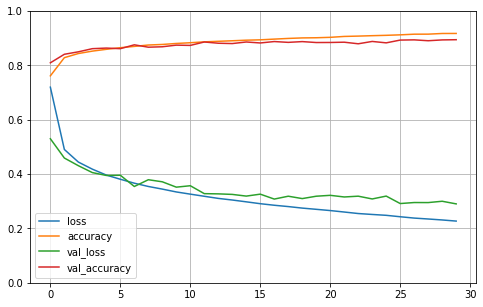

In [26]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# **Exercise 5**

In [27]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 66.5925 - accuracy: 0.8441


[66.59252166748047, 0.8440999984741211]

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
Y_pred = model.predict_classes(X_new)
print(Y_pred)

[9 2 1]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [30]:
import numpy as np
print(np.array(class_name)[Y_pred])

['Ankle boot' 'Pullover' 'Trouser']


In [31]:
Y_new = Y_test[:3]
Y_new

array([9, 2, 1], dtype=uint8)

# **Exercise 6**

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

In [33]:
X_train_full, X_test, Y_train_full, Y_test = train_test_split(housing.data, 
                                                              housing.target)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_full, 
                                                      Y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [34]:
model = keras.models.Sequential([keras.layers.Dense(30, activation = "relu", 
                                 input_shape = X_train.shape[1:]),
                                 keras.layers.Dense(1)])
model.compile(loss="mean_squared_error", optimizer='sgd')
history = model.fit(X_train, Y_train, epochs = 20, 
                    validation_data = (X_valid, Y_valid))
mse_test = model.evaluate(X_test, Y_test)
X_new = X_test[:3]
Y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2858 - val_loss: 0.5891
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5786 - val_loss: 0.5010
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5053 - val_loss: 0.4735
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4981 - val_loss: 0.4610
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4671 - val_loss: 0.4428
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4431 - val_loss: 0.4333
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4509 - val_loss: 0.4268
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4374 - val_loss: 0.4257
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4305 - val_loss: 0.4190
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4628 - val_loss: 0.4138

# **Exercise 7**

In [35]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input_], outputs = [output])

In [36]:
input_A = keras.layers.Input(shape = [5], name = "wide_input")
input_B = keras.layers.Input(shape = [6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = "output")(concat)
model = keras.Model(inputs = [input_A, input_B], outputs = [output])

In [37]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr = 1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), Y_train, epochs = 20, 
                    validation_data = ((X_valid_A, X_valid_B),Y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), Y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 3.6133 - val_loss: 1.0137
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8955 - val_loss: 0.8043
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7569 - val_loss: 0.7263
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6961 - val_loss: 0.6810
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6826 - val_loss: 0.6473
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6289 - val_loss: 0.6206
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5998 - val_loss: 0.5998
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5727 - val_loss: 0.5813
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5793 - val_loss: 0.5664
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5662 - val_loss: 0.5536

In [39]:
output = keras.layers.Dense(1, name = "main_output")(concat)
aux_output = keras.layers.Dense(1, name = "aux_output")(hidden2)
model = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])

In [41]:
model.compile(loss = ['mse', 'mse'], loss_weights = [0.9, 0.1], optimizer = 'sgd')
history = model.fit([X_train_A, X_train_B], [Y_train, Y_train], epochs = 20,
                    validation_data = ([X_valid_A, X_valid_B], [Y_valid, Y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3812 - main_output_loss: 0.3646 - aux_output_loss: 0.5304 - val_loss: 0.3684 - val_main_output_loss: 0.3525 - val_aux_output_loss: 0.5107
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3757 - main_output_loss: 0.3596 - aux_output_loss: 0.5205 - val_loss: 0.3665 - val_main_output_loss: 0.3508 - val_aux_output_loss: 0.5073
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3623 - main_output_loss: 0.3473 - aux_output_loss: 0.4974 - val_loss: 0.3590 - val_main_output_loss: 0.3441 - val_aux_output_loss: 0.4935
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3621 - main_output_loss: 0.3476 - aux_output_loss: 0.4922 - val_loss: 0.3549 - val_main_output_loss: 0.3399 - val_aux_output_loss: 0.4897
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3704 - main_output_loss: 0.3568 - aux_output_loss: 0.4921 - val_loss

In [42]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [Y_test, 
                                                                        Y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.3237 - main_output_loss: 0.3149 - aux_output_loss: 0.4029


In [43]:
Y_pred_main, Y_pred_aux = model.predict([X_new_A, X_new_B])